## Analysis of the results of experiment 1 on LLaMA3.2: Cross-Modal Probability Analysis

In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
folders = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10']

all_dfs = []
for i, folder in enumerate(folders, start=1):
    file_path = os.path.join(folder, 'llama_results.csv')
    df = pd.read_csv(file_path)
    df['run'] = f"Run {i}"
    all_dfs.append(df)

combined_df = pd.concat(all_dfs, ignore_index=True)

In [3]:
combined_df['congruent'] = combined_df['congruent'].astype(bool)

print(combined_df.groupby(['run', 'congruent'])['probability'].describe())

                  count       mean        std  min    25%   50%    75%    max
run    congruent                                                             
Run 1  False       59.0  40.186441  35.700128  0.0   5.00  40.0  65.00  100.0
       True        59.0  40.322034  35.720390  0.0   0.50  35.0  70.00  100.0
Run 10 False       57.0  35.315789  34.505257  0.0   1.00  25.0  60.00  100.0
       True        59.0  37.118644  35.589172  0.0   0.00  30.0  70.00  100.0
Run 2  False       57.0  38.210526  35.433911  0.0   0.00  30.0  70.00  100.0
       True        58.0  37.172414  35.561234  0.0   0.00  30.0  67.50  100.0
Run 3  False       56.0  41.910714  36.372456  0.0   5.00  30.0  70.00  100.0
       True        57.0  30.438596  36.022323  0.0   0.00  20.0  50.00  100.0
Run 4  False       59.0  37.966102  35.308476  0.0   0.50  30.0  70.00  100.0
       True        61.0  40.426230  35.340467  0.0   0.00  40.0  70.00  100.0
Run 5  False       57.0  31.385965  31.715676  0.0   1.00  25.0 

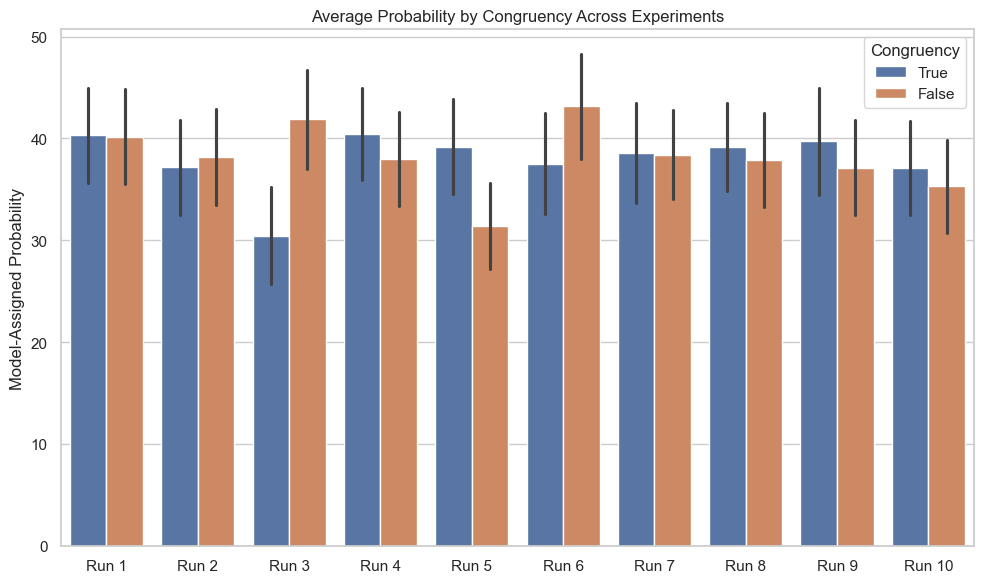

In [4]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.barplot(
    data=combined_df,
    x="run",
    y="probability",
    hue="congruent",
    hue_order=[True, False],
    errorbar="se"
)
plt.title("Average Probability by Congruency Across Experiments")
plt.ylabel("Model-Assigned Probability")
plt.xlabel("")
plt.legend(title="Congruency")
plt.tight_layout()
plt.show()

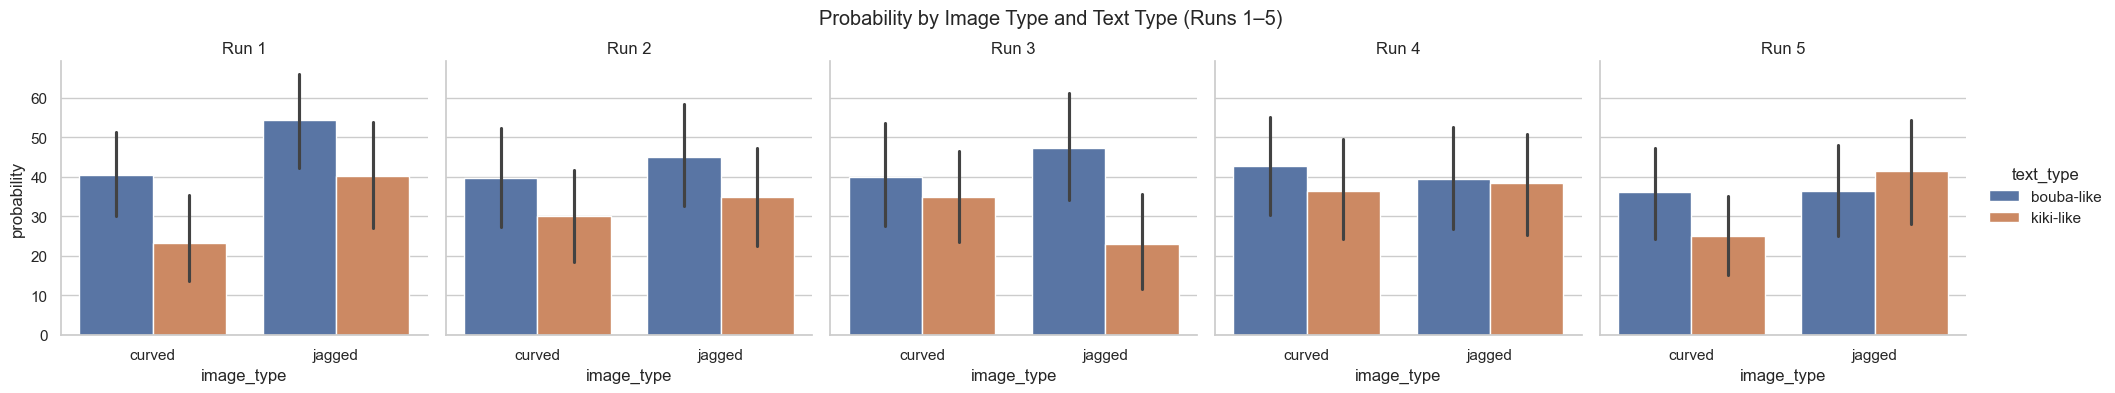

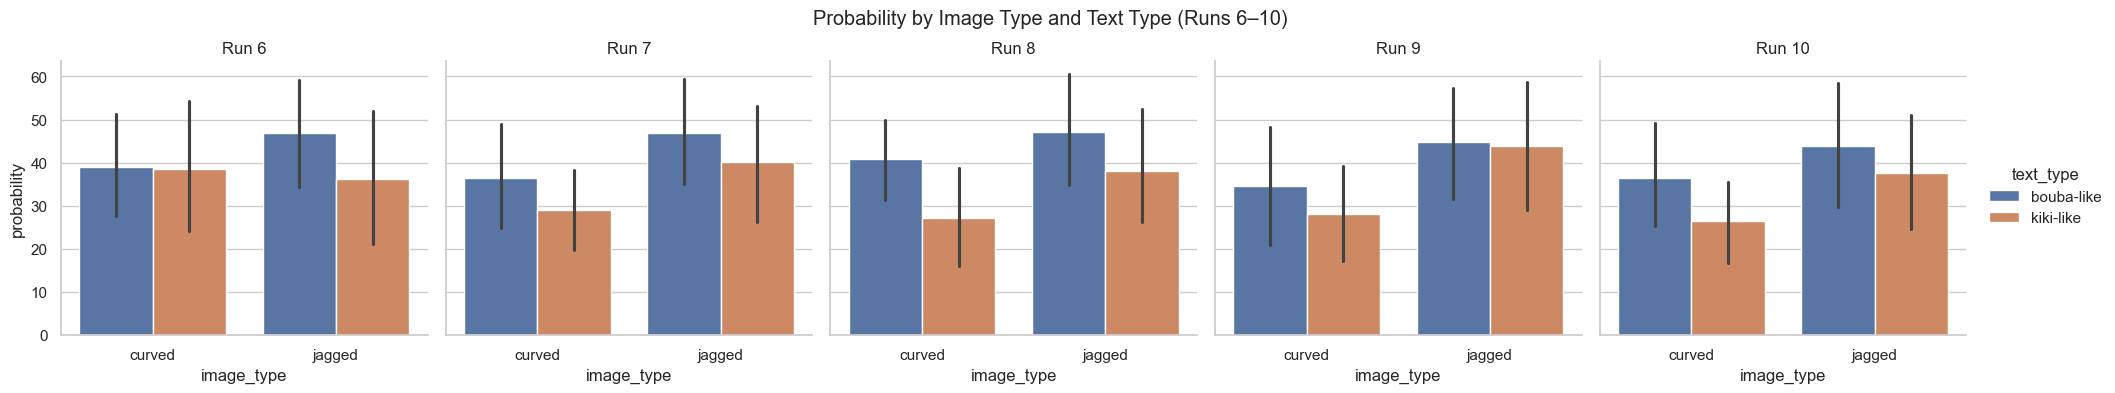

In [5]:
df_first_half = combined_df[combined_df['run'].isin([f"Run {i}" for i in range(1, 6)])]
df_second_half = combined_df[combined_df['run'].isin([f"Run {i}" for i in range(6, 11)])]

g1 = sns.catplot(
    data=df_first_half,
    x="image_type", y="probability", hue="text_type",
    kind="bar", col="run", height=4, aspect=1
)
g1.set_titles(col_template="{col_name}")
plt.subplots_adjust(top=0.85)
g1.fig.suptitle("Probability by Image Type and Text Type (Runs 1–5)")
plt.show()

g2 = sns.catplot(
    data=df_second_half,
    x="image_type", y="probability", hue="text_type",
    kind="bar", col="run", height=4, aspect=1
)

g2.set_titles(col_template="{col_name}")
plt.subplots_adjust(top=0.85)
g2.fig.suptitle("Probability by Image Type and Text Type (Runs 6–10)")
plt.show()

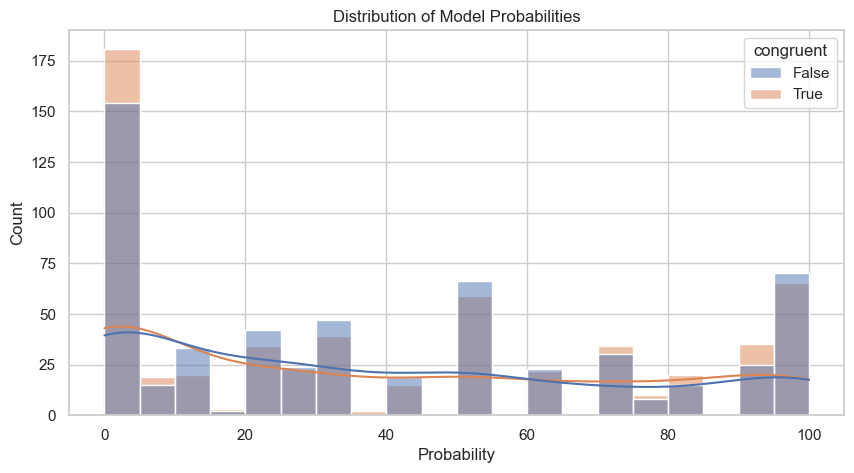

In [6]:
plt.figure(figsize=(10, 5))
sns.histplot(data=combined_df, x="probability", hue="congruent", kde=True, bins=20)
plt.title("Distribution of Model Probabilities")
plt.xlabel("Probability")
plt.ylabel("Count")
plt.show()

Metrics

In [7]:
folders = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10']

metrics_dfs = []
for i, folder in enumerate(folders, start=1):
    path = os.path.join(folder, "llama_metrics.csv")
    df = pd.read_csv(path)
    df["run"] = f"{i}"
    metrics_dfs.append(df)

metrics_df = pd.concat(metrics_dfs, ignore_index=True)

In [8]:
metrics_df

,model,congruent_probability,incongruent_probability,effect_strength,overall_bias,curved_bouba_prob,curved_kiki_prob,jagged_bouba_prob,jagged_kiki_prob,n_samples,run
0,llama,40.322034,40.186441,0.135593,-9.745763,40.384615,23.222222,54.500000,40.272727,136,1
1,llama,37.172414,38.210526,-1.038113,-12.313043,39.666667,30.192308,44.935484,35.000000,136,2
2,llama,30.438596,41.910714,-11.472118,-13.876106,40.000000,34.875000,47.187500,22.968750,136,3
3,llama,40.426230,37.966102,2.460128,-10.783333,42.714286,36.428571,39.354839,38.484848,136,4
4,llama,39.210526,31.385965,7.824561,-14.701754,36.083333,25.080000,36.312500,41.484848,136,5
5,llama,37.517241,43.145455,-5.628213,-9.743363,38.962963,38.416667,46.806452,36.258065,136,6
6,llama,38.596491,38.423729,0.172762,-11.491379,36.458333,28.964286,46.967742,40.151515,136,7
7,llama,39.192982,37.896552,1.296431,-11.460870,40.800000,27.222222,47.193548,37.937500,136,8
8,llama,39.733333,37.140351,2.592982,-11.529915,34.629630,28.115385,44.709677,43.909091,136,9
9,llama,37.118644,35.315789,1.802855,-13.767241,36.518519,26.357143,43.965517,37.625000,136,10


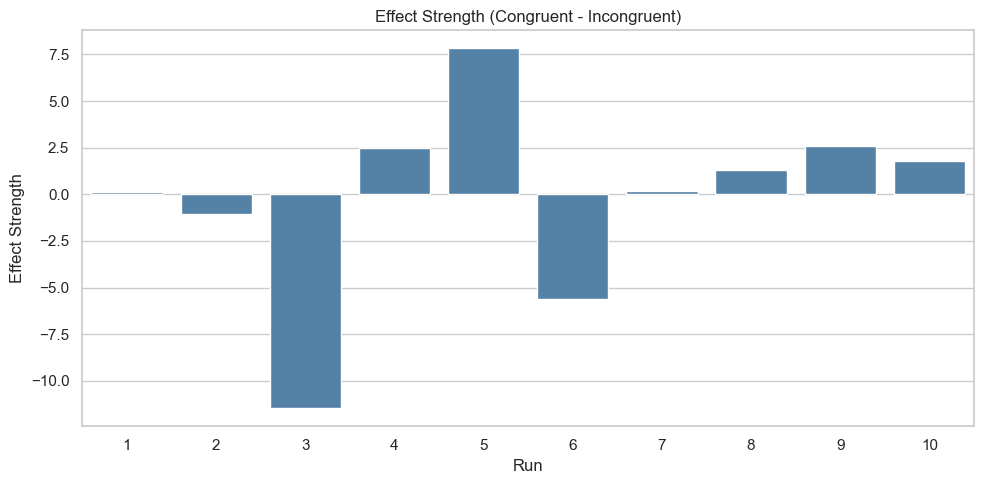

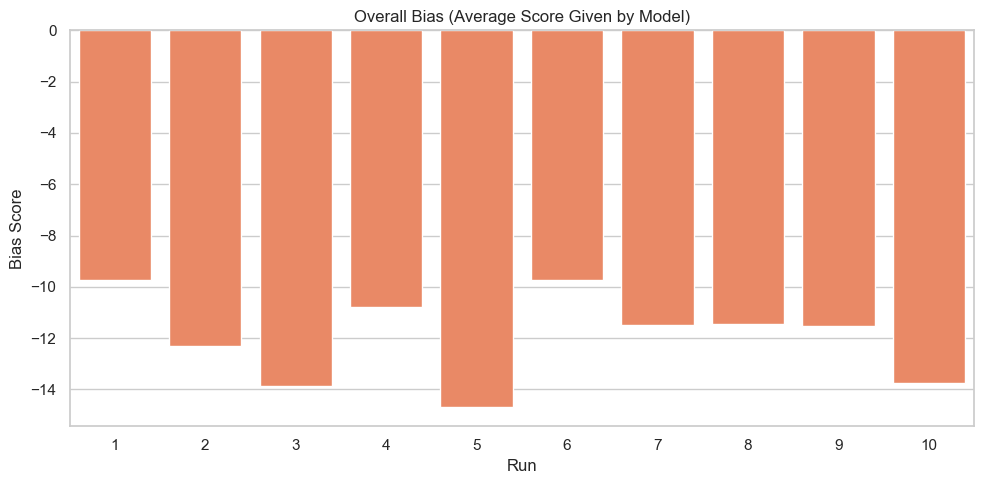

In [9]:
plt.figure(figsize=(10, 5))
sns.barplot(data=metrics_df, x="run", y="effect_strength", color="steelblue")
plt.title("Effect Strength (Congruent - Incongruent)")
plt.ylabel("Effect Strength")
plt.xlabel("Run")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 5))
sns.barplot(data=metrics_df, x="run", y="overall_bias", color="coral")
plt.title("Overall Bias (Average Score Given by Model)")
plt.xlabel("Run")
plt.ylabel("Bias Score")
plt.tight_layout()
plt.show()

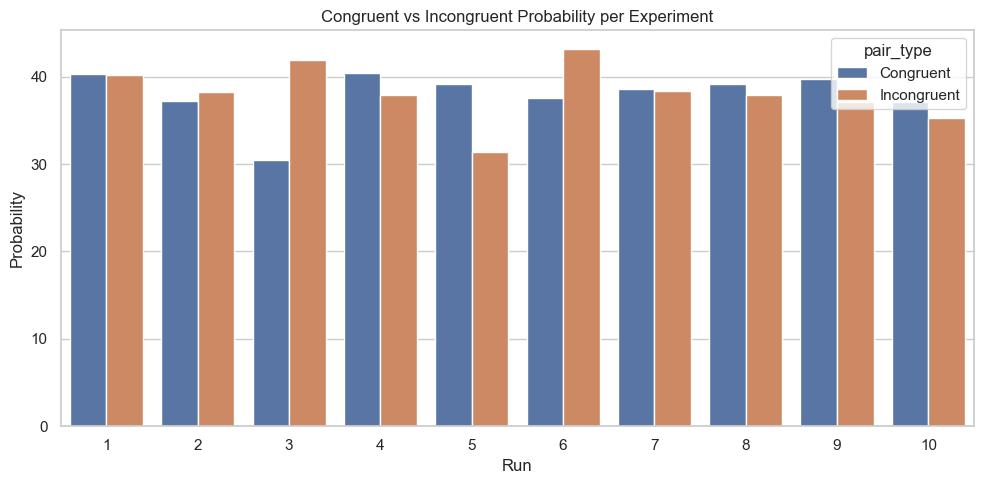

In [10]:
metrics_df_melted = metrics_df.melt(
    id_vars=["run"], 
    value_vars=["congruent_probability", "incongruent_probability"],
    var_name="pair_type", 
    value_name="probability"
)

label_map = {
    "congruent_probability": "Congruent",
    "incongruent_probability": "Incongruent"
}
metrics_df_melted["pair_type"] = metrics_df_melted["pair_type"].replace(label_map)

# Now plot
plt.figure(figsize=(10, 5))
sns.barplot(data=metrics_df_melted, x="run", y="probability", hue="pair_type")
plt.title("Congruent vs Incongruent Probability per Experiment")
plt.xlabel("Run")
plt.ylabel("Probability")
plt.tight_layout()
plt.show()

Image stats

In [11]:
image_stats_dfs = []
for i, folder in enumerate(folders, start=1):
    path = os.path.join(folder, "image_stats.csv")
    df = pd.read_csv(path)
    df["iteration"] = f"Iter. {i}"
    image_stats_dfs.append(df)

image_stats_df = pd.concat(image_stats_dfs, ignore_index=True)

C:\Users\robkr\AppData\Local\Temp\ipykernel_21084\65902386.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=image_stats_df_sorted, y="image_path", x="avg_score", palette="viridis")


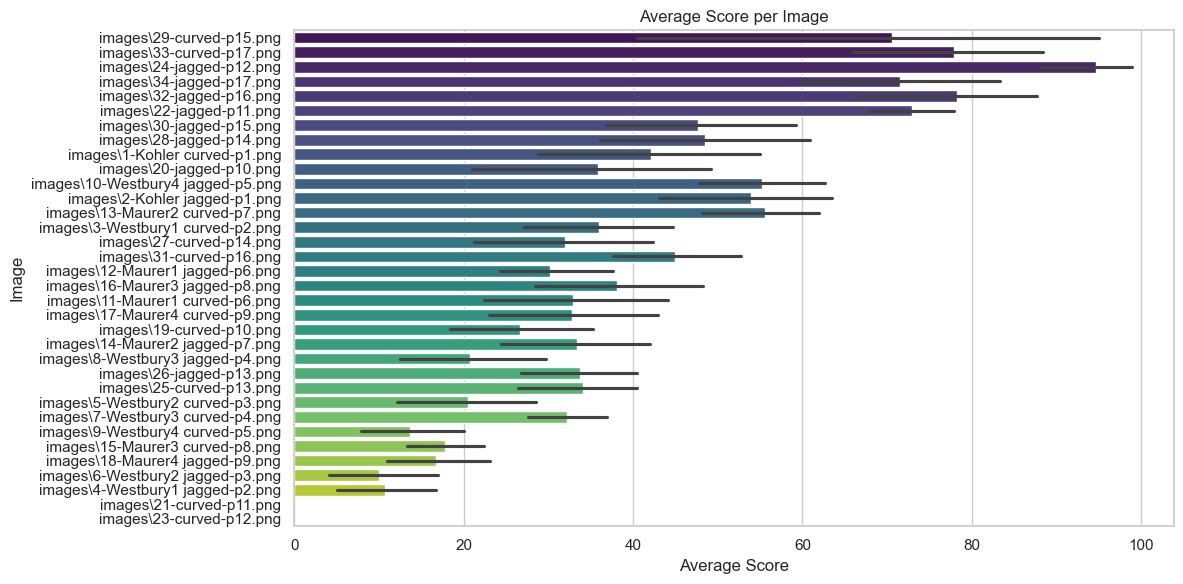

In [12]:
image_stats_df_sorted = image_stats_df.sort_values("avg_score", ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(data=image_stats_df_sorted, y="image_path", x="avg_score", palette="viridis")
plt.title("Average Score per Image")
plt.xlabel("Average Score")
plt.ylabel("Image")
plt.tight_layout()
plt.show()

C:\Users\robkr\AppData\Local\Temp\ipykernel_21084\72884310.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=image_stats_df.sort_values("std_dev", ascending=False),


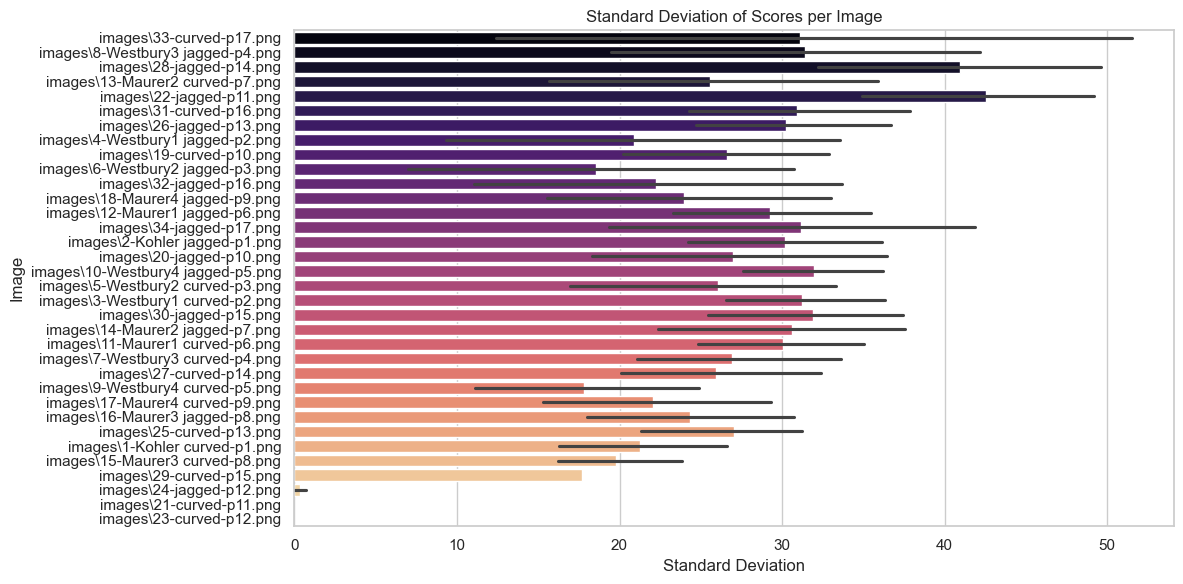

In [13]:
plt.figure(figsize=(12, 6))
sns.barplot(data=image_stats_df.sort_values("std_dev", ascending=False),
            x="std_dev", y="image_path", palette="magma")
plt.title("Standard Deviation of Scores per Image")
plt.xlabel("Standard Deviation")
plt.ylabel("Image")
plt.tight_layout()
plt.show()

C:\Users\robkr\AppData\Local\Temp\ipykernel_21084\3077385530.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=image_stats_df, x="shape", y="avg_score", palette="Set2")


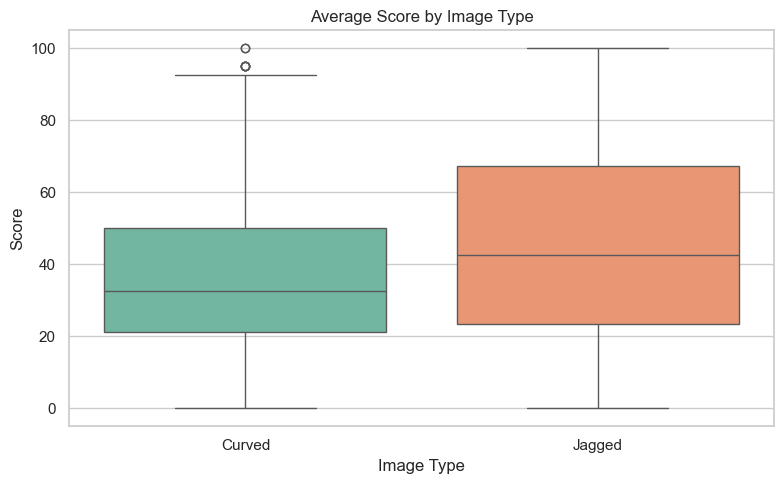

In [14]:
image_stats_df["shape"] = image_stats_df.apply(
    lambda row: "Curved" if row["curved"] else "Jagged", axis=1
)

plt.figure(figsize=(8, 5))
sns.boxplot(data=image_stats_df, x="shape", y="avg_score", palette="Set2")
plt.title("Average Score by Image Type")
plt.ylabel("Score")
plt.xlabel("Image Type")
plt.tight_layout()
plt.show()

In [15]:
metrics_df.to_csv("combined_results/combined_llama_metrics.csv", index=False)
image_stats_df.to_csv("combined_results/combined_image_stats.csv", index=False)

In [16]:
folders = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10']
file_name = 'llama_metrics.csv'

results = []

for folder in folders:
    file_path = os.path.join(folder, file_name)
    
    df = pd.read_csv(file_path)
    
    data = {
        'curved_bouba_prob': df['curved_bouba_prob'].iloc[0],
        'curved_kiki_prob': df['curved_kiki_prob'].iloc[0],
        'jagged_bouba_prob': df['jagged_bouba_prob'].iloc[0],
        'jagged_kiki_prob': df['jagged_kiki_prob'].iloc[0]
    }
    
    results.append(data)

results_df = pd.DataFrame(results)

results_df

,curved_bouba_prob,curved_kiki_prob,jagged_bouba_prob,jagged_kiki_prob
0,40.384615,23.222222,54.500000,40.272727
1,39.666667,30.192308,44.935484,35.000000
2,40.000000,34.875000,47.187500,22.968750
3,42.714286,36.428571,39.354839,38.484848
4,36.083333,25.080000,36.312500,41.484848
5,38.962963,38.416667,46.806452,36.258065
6,36.458333,28.964286,46.967742,40.151515
7,40.800000,27.222222,47.193548,37.937500
8,34.629630,28.115385,44.709677,43.909091
9,36.518519,26.357143,43.965517,37.625000


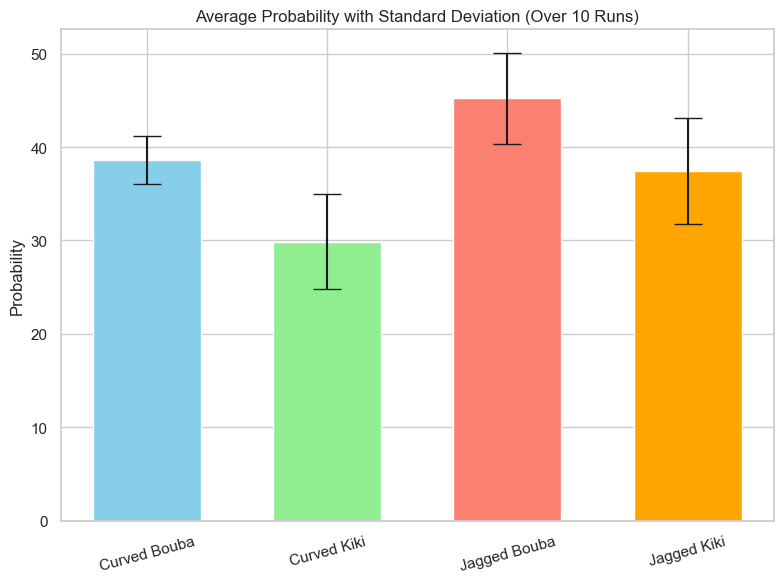

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Data
data = {
    'curved_bouba_prob': [40.384615, 39.666667, 40.0, 42.714286, 36.083333, 38.962963, 36.458333, 40.8, 34.62963, 36.518519],
    'curved_kiki_prob': [23.222222, 30.192308, 34.875, 36.428571, 25.08, 38.416667, 28.964286, 27.222222, 28.115385, 26.357143],
    'jagged_bouba_prob': [54.5, 44.935484, 47.1875, 39.354839, 36.3125, 46.806452, 46.967742, 47.193548, 44.709677, 43.965517],
    'jagged_kiki_prob': [40.272727, 35.0, 22.96875, 38.484848, 41.484848, 36.258065, 40.151515, 37.9375, 43.909091, 37.625]
}

df = pd.DataFrame(data)

# Calculate means and standard deviations
means = df.mean()
stds = df.std()

# Bar plot
categories = ['Curved Bouba', 'Curved Kiki', 'Jagged Bouba', 'Jagged Kiki']
x = np.arange(len(categories))
width = 0.6

fig, ax = plt.subplots(figsize=(8, 6))
bars = ax.bar(x, means, yerr=stds, capsize=10, width=width, color=['skyblue', 'lightgreen', 'salmon', 'orange'])

ax.set_xticks(x)
ax.set_xticklabels(categories, rotation=15)
ax.set_ylabel('Probability')
ax.set_title('Average Probability with Standard Deviation (Over 10 Runs)')

plt.tight_layout()
plt.show()

In [51]:
import pandas as pd
from scipy.stats import ttest_ind, shapiro, levene
import os

df = combined_df.copy()

df["probability"] = df["probability"].astype(float)

def test_model_congruency(df, model_name):
    model_df = df[df["model"] == model_name]
    congruent_probs = model_df.loc[model_df["congruent"] == True, "probability"].dropna()
    incongruent_probs = model_df.loc[model_df["congruent"] == False, "probability"].dropna()

    # Test for normality
    p_c = shapiro(congruent_probs).pvalue
    p_i = shapiro(incongruent_probs).pvalue
    normal = (p_c > 0.05) and (p_i > 0.05)

    # Test for equal variance
    p_levene = levene(congruent_probs, incongruent_probs).pvalue
    equal_var = p_levene > 0.05

    # Choose t-test
    t_result = ttest_ind(congruent_probs, incongruent_probs, equal_var=equal_var)
    test_name = "Student's t-test" if normal and equal_var else "Welch's t-test"

    return {
        "model": model_name,
        "test_used": test_name,
        "p_value": t_result.pvalue,
        "t_statistic": t_result.statistic,
        "congruent_mean": congruent_probs.mean(),
        "incongruent_mean": incongruent_probs.mean(),
        "normality_passed": normal,
        "equal_variance_passed": equal_var,
        "n_congruent": len(congruent_probs),
        "n_incongruent": len(incongruent_probs)
    }

# Run for each model
results = []
for model in df["model"].unique():
    results.append(test_model_congruency(df, model))

# Convert results to DataFrame
results_df = pd.DataFrame(results)

results_df.head()

,model,test_used,p_value,t_statistic,congruent_mean,incongruent_mean,normality_passed,equal_variance_passed,n_congruent,n_incongruent
0,llama,Welch's t-test,0.946797,-0.066744,38.001715,38.141115,False,True,583,574
